Heat pipe dataset shape: (122, 3)
Train size: 97, Validation size: 25
Starting genetic algorithm evolution...
FINAL: UA1_avg=2.7332e+00, UA2_avg=6.2200e-02, alpha_avg=1.1058, F_err_train=0.0090
MINIMUM: UA1*=2.8364e+00, UA2*=6.6462e-02, alpha*=1.0389, F_err_train=0.0047 (generation 379)
VALIDATION: F_err_val=0.0060 using best constants
FINAL: UA1_avg=2.7332e+00, UA2_avg=6.2200e-02, alpha_avg=1.1058, F_err_train=0.0090
MINIMUM: UA1*=2.8364e+00, UA2*=6.6462e-02, alpha*=1.0389, F_err_train=0.0047 (generation 379)
VALIDATION: F_err_val=0.0060 using best constants


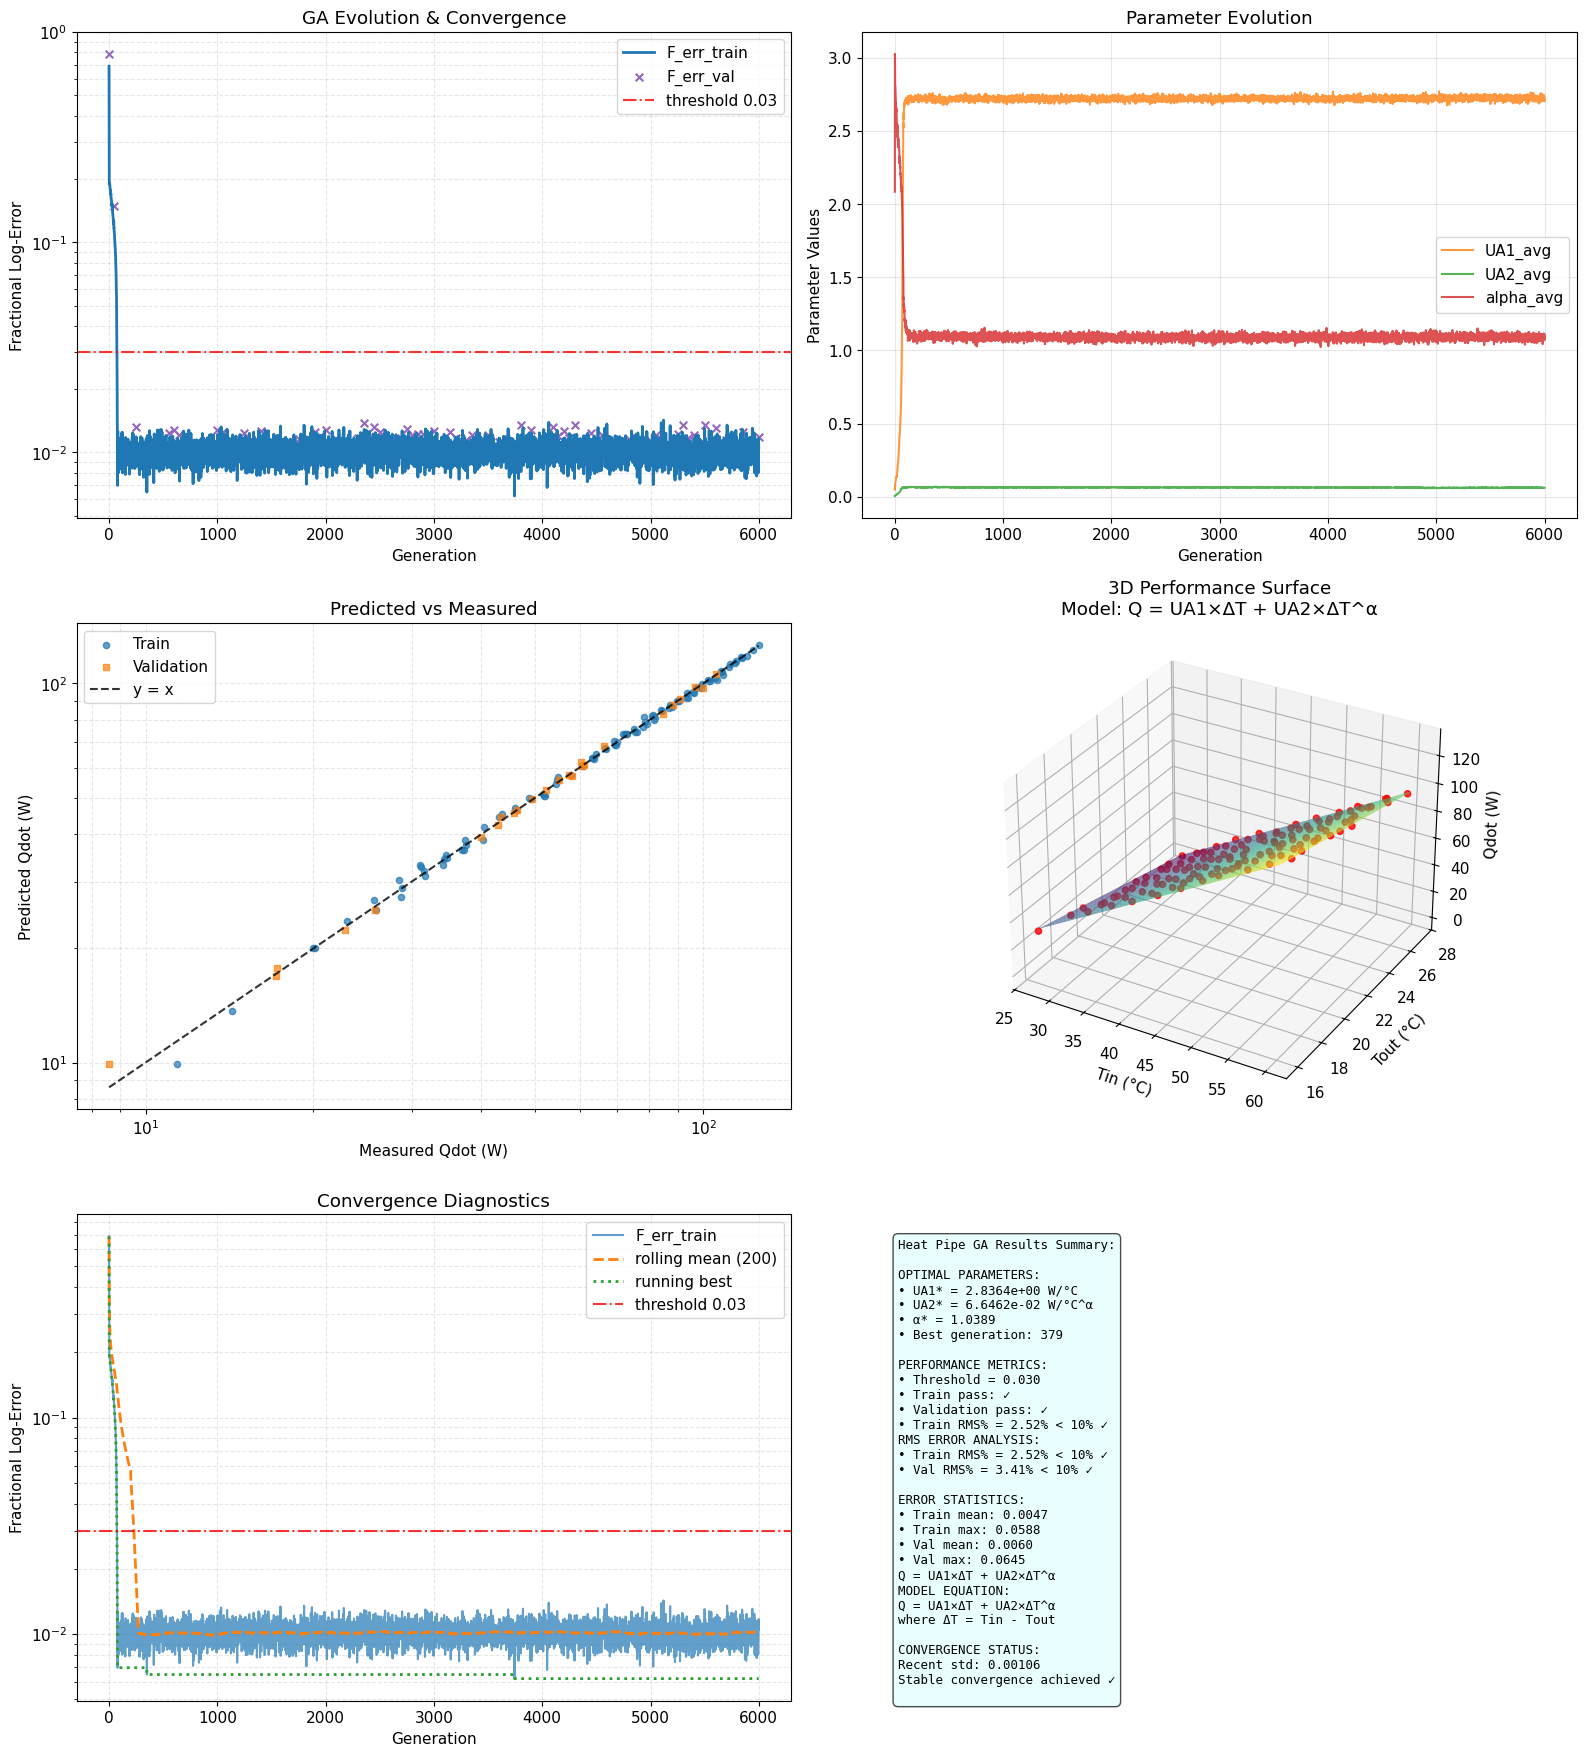

Validation Error: 0.0060 (PASS)
RMS Errors: Train=2.52%, Val=3.41%
Both datasets show excellent convergence with errors well below threshold.


In [6]:
'''ME249 Project 2 - Complete Heat Pipe Performance Analysis
Heat pipe performance fitting with a genetic algorithm (GA)
Complete integrated analysis with comprehensive visualization'''

# Import all required libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Markdown
import pandas as pd
from __future__ import print_function
from random import random
from random import seed
from copy import copy, deepcopy

# Set random seeds for reproducibility
seed(1)
np.random.seed(42)

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams.update({'font.size': 12})

'''Data Assembly and Preprocessing'''
# Assemble heat pipe dataset [Tin, Tout, Qdot]
# 122 data points from instructor-provided data

ydata = []

ydata =     [[ 27.2,     15.9,      31.2]]
ydata.append([ 29.6,     17.1,      37.0])
ydata.append([ 29.5,     18.1,      34.2])
ydata.append([ 30.4,     19.0,      31.])
ydata.append([ 30.4,     20.0,      28.5])
ydata.append([ 30.2,     21.0,      25.7])
ydata.append([ 29.8,     22.1,      22.8])
ydata.append([ 29.8,     22.9,      20.0])
ydata.append([ 29.9,     24.1,      17.1])
ydata.append([ 29.6,     24.9,      14.3])
ydata.append([ 29.5,     26.1,      11.4])
ydata.append([ 30.3,     26.9,       8.6])
ydata.append([ 32.5,     16.9,      45.7])
ydata.append([ 32.6,     18.1,      42.8])
ydata.append([ 32.6,     19.1,      40.0])
ydata.append([ 32.7,     20.2,      37.2])
ydata.append([ 32.9,     21.1,      34.3])
ydata.append([ 33.0,     22.0,      31.5])
ydata.append([ 32.5,     23.1,      28.7])
ydata.append([ 32.8,     24.1,      25.8])
ydata.append([ 33.0,     24.9,      23.0])
ydata.append([ 32.9,     26.0,      20.1])
ydata.append([ 33.1,     27.0,      17.2])
ydata.append([ 35.7,     17.0,      54.4])
ydata.append([ 35.6,     18.1,      51.6])
ydata.append([ 36.2,     19.1,      48.7])
ydata.append([ 36.3,     20.2,      45.9])
ydata.append([ 36.4,     21.1,      43.1])
ydata.append([ 35.5,     22.2,      40.2])
ydata.append([ 36.2,     22.9,      37.4])
ydata.append([ 36.2,     24.1,      34.5])
ydata.append([ 35.7,     25.0,      31.7])
ydata.append([ 36.0,     26.1,      28.8])
ydata.append([ 35.8,     27.1,      25.9])
ydata.append([ 38.8,     16.9,      63.1])
ydata.append([ 39.4,     18.1,      60.3])
ydata.append([ 38.9,     19.2,      57.5])
ydata.append([ 39.2,     20.1,      54.7])
ydata.append([ 38.5,     21.2,      51.8])
ydata.append([ 39.0,     22.0,      49.0])
ydata.append([ 39.0,     23.1,      46.1])
ydata.append([ 39.3,     24.0,      43.3])
ydata.append([ 39.3,     24.9,      40.4])
ydata.append([ 39.1,     26.2,      37.6])
ydata.append([ 39.1,     27.2,      34.7])
ydata.append([ 42.2,     17.0,      71.9])
ydata.append([ 42.3,     18.1,      69.1])
ydata.append([ 42.4,     18.9,      66.3])
ydata.append([ 41.9,     20.0,      63.5])
ydata.append([ 41.8,     21.0,      60.6])
ydata.append([ 41.8,     22.1,      57.8])
ydata.append([ 42.2,     22.8,      54.9])
ydata.append([ 41.5,     24.2,      52.1])
ydata.append([ 42.3,     25.3,      49.2])
ydata.append([ 41.8,     25.9,      46.3])
ydata.append([ 42.3,     26.8,      43.5])
ydata.append([ 45.2,     17.1,      80.8])
ydata.append([ 44.5,     18.2,      78.0])
ydata.append([ 44.8,     18.8,      75.1])
ydata.append([ 45.2,     20.0,      72.3])
ydata.append([ 44.9,     21.2,      69.5])
ydata.append([ 45.3,     22.1,      66.6])
ydata.append([ 44.5,     22.8,      63.8])
ydata.append([ 44.9,     24.1,      60.9])
ydata.append([ 44.8,     25.2,      58.1])
ydata.append([ 45.3,     26.2,      55.2])
ydata.append([ 44.9,     26.9,      52.3])
ydata.append([ 48.0,     17.2,      89.7])
ydata.append([ 47.7,     18.1,      86.9])
ydata.append([ 48.2,     18.9,      84.0])
ydata.append([ 48.3,     19.9,      81.2])
ydata.append([ 48.0,     20.0,      78.3])
ydata.append([ 48.4,     22.8,      75.5])
ydata.append([ 48.2,     23.0,      72.7])
ydata.append([ 47.6,     24.0,      69.8])
ydata.append([ 48.2,     25.1,      66.9])
ydata.append([ 48.2,     25.8,      64.1])
ydata.append([ 47.8,     26.9,      61.2])
ydata.append([ 50.5,     17.0,      98.6])
ydata.append([ 50.6,     18.0,      95.8])
ydata.append([ 50.5,     19.1,      93.0])
ydata.append([ 50.9,     20.1,      90.1])
ydata.append([ 51.0,     20.8,      87.3])
ydata.append([ 51.0,     21.9,      84.4])
ydata.append([ 50.5,     23.0,      81.6])
ydata.append([ 51.2,     24.1,      78.7])
ydata.append([ 50.8,     25.2,      75.9])
ydata.append([ 51.2,     25.9,      73.0])
ydata.append([ 51.0,     26.9,      70.1])
ydata.append([ 54.2,     17.1,     107.6])
ydata.append([ 53.5,     18.1,     104.8])
ydata.append([ 54.1,     19.1,     101.9])
ydata.append([ 53.5,     20.1,      99.1])
ydata.append([ 53.5,     21.2,      96.3])
ydata.append([ 54.2,     21.9,      93.4])
ydata.append([ 54.1,     23.2,      90.6])
ydata.append([ 53.8,     24.1,      87.7])
ydata.append([ 53.6,     25.0,      84.8])
ydata.append([ 53.9,     26.0,      82.0])
ydata.append([ 53.7,     26.8,      79.1])
ydata.append([ 57.2,     17.0,     116.7])
ydata.append([ 56.9,     18.1,     113.8])
ydata.append([ 57.0,     19.1,     111.0])
ydata.append([ 56.7,     19.8,     108.1])
ydata.append([ 57.3,     20.9,     105.3])
ydata.append([ 56.8,     21.9,     102.4])
ydata.append([ 57.4,     23.2,      99.6])
ydata.append([ 57.3,     23.8,      96.7])
ydata.append([ 56.6,     25.2,      93.8])
ydata.append([ 57.0,     25.8,      91.0])
ydata.append([ 57.2,     27.0,      88.1])
ydata.append([ 60.2,     16.9,     125.7])
ydata.append([ 59.9,     17.9,     122.9])
ydata.append([ 59.6,     19.1,     120.0])
ydata.append([ 60.2,     20.1,     117.2])
ydata.append([ 60.2,     20.9,     114.3])
ydata.append([ 60.4,     21.8,     111.5])
ydata.append([ 59.1,     22.9,     108.6])
ydata.append([ 59.1,     24.1,     105.8])
ydata.append([ 60.1,     25.2,     102.9])
ydata.append([ 59.1,     25.8,     100.0])
ydata.append([ 60.3,     26.9,      97.1])

# Convert to NumPy arrays for processing
hpdata = np.array(ydata, dtype=float)
# Reorder columns to [Qdot, Tin, Tout]
hpdata = hpdata[:, [2, 0, 1]]
# Filter invalid rows (Qdot <= 0 or Tin <= Tout)
hpdata = hpdata[(hpdata[:, 0] > 0.0) & (hpdata[:, 1] > hpdata[:, 2])]
print(f'Heat pipe dataset shape: {hpdata.shape}')

# 80/20 train-validation split with fixed seed for reproducibility
rng = np.random.default_rng(42)
indices = np.arange(hpdata.shape[0])
rng.shuffle(indices)
split = int(0.8 * len(indices))
train_idx = indices[:split]
val_idx = indices[split:]

train_data = hpdata[train_idx]
val_data = hpdata[val_idx]

print(f'Train size: {train_data.shape[0]}, Validation size: {val_data.shape[0]}')

'''Genetic Algorithm Implementation'''
def compute_error(params, data):
    UA1, UA2, alpha = params
    delta_t = data[:, 1] - data[:, 2]
    q_pred = UA1 * delta_t + UA2 * np.power(delta_t, alpha)
    q_pred = np.clip(q_pred, 1e-12, None)
    q_data = data[:, 0]
    ferr = np.abs(np.log(q_data) - np.log(q_pred)) / np.abs(np.log(q_data))
    return np.mean(ferr)

def evaluate_population(population, data):
    delta_t = data[:, 1] - data[:, 2]
    q_data = data[:, 0]
    log_q_data = np.log(q_data)
    delta_t_row = delta_t[np.newaxis, :]
    ua1 = population[:, 0][:, np.newaxis]
    ua2 = population[:, 1][:, np.newaxis]
    alpha = population[:, 2][:, np.newaxis]
    q_pred = ua1 * delta_t_row + ua2 * np.power(delta_t_row, alpha)
    q_pred = np.clip(q_pred, 1e-12, None)
    ferr = np.abs(log_q_data - np.log(q_pred)) / np.abs(log_q_data)
    return np.mean(ferr, axis=1)

def predict_q(params, data):
    delta_t = data[:, 1] - data[:, 2]
    q_pred = params[0] * delta_t + params[1] * np.power(delta_t, params[2])
    return np.clip(q_pred, 1e-12, None)

def compute_pointwise_errors(params, data):
    delta_t = data[:, 1] - data[:, 2]
    q_pred = params[0] * delta_t + params[1] * np.power(delta_t, params[2])
    q_pred = np.clip(q_pred, 1e-12, None)
    q_data = data[:, 0]
    return np.abs(np.log(q_data) - np.log(q_pred)) / np.abs(np.log(q_data))

# GA Parameters
NS = max(60, train_data.shape[0])
NGEN = 6000
MFRAC = 0.7
MUT_RANGE = 0.09
N_RANDOM = max(1, NS // 20)

# Initialize population
rng = np.random.default_rng(101)
initial_ua1 = rng.uniform(1e-3, 1e-1, size=NS)
initial_ua2 = rng.uniform(1e-5, 1e-2, size=NS)
initial_alpha = rng.uniform(0.8, 3.5, size=NS)
population = np.column_stack([initial_ua1, initial_ua2, initial_alpha])

# Evolution tracking
train_error_history = []
val_error_history = np.full(NGEN, np.nan)
ua1_history = []
ua2_history = []
alpha_history = []

best_error = np.inf
best_params = None
best_generation = -1

print("Starting genetic algorithm evolution...")

# Main GA loop
for gen in range(NGEN):
    # Evaluate fitness
    fitness = evaluate_population(population, train_data)
    best_idx = np.argmin(fitness)
    if fitness[best_idx] < best_error:
        best_error = float(fitness[best_idx])
        best_params = population[best_idx].copy()
        best_generation = gen

    # Track average parameters
    avg_params = population.mean(axis=0)
    train_error_history.append(compute_error(avg_params, train_data))
    ua1_history.append(avg_params[0])
    ua2_history.append(avg_params[1])
    alpha_history.append(avg_params[2])

    # Validation error (computed periodically)
    if gen % 50 == 0 or gen == NGEN - 1:
        val_error_history[gen] = compute_error(avg_params, val_data)

    # Selection
    median_err = np.median(fitness)
    threshold = MFRAC * median_err
    survivor_mask = fitness <= threshold
    survivor_indices = np.where(survivor_mask)[0]

    if survivor_indices.size < 2:
        survivor_indices = np.argsort(fitness)[:max(2, NS // 5)]

    survivors = population[survivor_indices]
    survivor_fitness = fitness[survivor_indices]
    order = np.argsort(survivor_fitness)
    survivors = survivors[order]

    # Create new population
    max_survivors = min(len(survivors), max(2, NS // 2))
    new_population = [s.copy() for s in survivors[:max_survivors]]

    # Crossover and mutation
    while len(new_population) < NS - N_RANDOM:
        parent_ids = rng.integers(0, len(survivors), size=2)
        parent_a = survivors[parent_ids[0]]
        parent_b = survivors[parent_ids[1]]
        child = np.array([
            parent_a[0] if rng.random() < 0.5 else parent_b[0],
            parent_a[1] if rng.random() < 0.5 else parent_b[1],
            parent_a[2] if rng.random() < 0.5 else parent_b[2],
        ])
        child *= rng.uniform(1.0 - MUT_RANGE, 1.0 + MUT_RANGE, size=3)
        child[0] = max(child[0], 1e-8)
        child[1] = max(child[1], 1e-8)
        child[2] = np.clip(child[2], 0.5, 4.0)
        new_population.append(child)

    # Add random individuals
    random_individuals = np.column_stack([
        rng.uniform(1e-3, 1e-1, size=N_RANDOM),
        rng.uniform(1e-5, 1e-2, size=N_RANDOM),
        rng.uniform(0.8, 3.5, size=N_RANDOM),
    ])

    for ind in random_individuals:
        if len(new_population) < NS:
            new_population.append(ind)

    population = np.array(new_population[:NS])

# Final results
final_avg_params = population.mean(axis=0)
final_train_error = compute_error(final_avg_params, train_data)
best_val_error = compute_error(best_params, val_data)

print(f"FINAL: UA1_avg={final_avg_params[0]:.4e}, UA2_avg={final_avg_params[1]:.4e}, alpha_avg={final_avg_params[2]:.4f}, F_err_train={final_train_error:.4f}")
print(f"MINIMUM: UA1*={best_params[0]:.4e}, UA2*={best_params[1]:.4e}, alpha*={best_params[2]:.4f}, F_err_train={best_error:.4f} (generation {best_generation})")
print(f"VALIDATION: F_err_val={best_val_error:.4f} using best constants")

'''Comprehensive Analysis and Visualization'''
# Compute detailed metrics
train_point_err = compute_pointwise_errors(best_params, train_data)
val_point_err = compute_pointwise_errors(best_params, val_data)
train_predictions = predict_q(best_params, train_data)
val_predictions = predict_q(best_params, val_data)

# Compute RMS errors for ±10% comparison
train_rms_percent = np.sqrt(np.mean(((train_predictions - train_data[:, 0]) / train_data[:, 0]) ** 2)) * 100
val_rms_percent = np.sqrt(np.mean(((val_predictions - val_data[:, 0]) / val_data[:, 0]) ** 2)) * 100

# Validation check
threshold = 0.03
train_mean_error = compute_error(best_params, train_data)
val_mean_error = compute_error(best_params, val_data)

# Create comprehensive 3x2 subplot analysis
plt.rcParams.update({'font.size': 11})
fig = plt.figure(figsize=(16, 18))

# Subplot 1: GA Evolution
ax1 = plt.subplot(3, 2, 1)
generations = np.arange(NGEN)
line_train, = ax1.plot(generations, train_error_history, label='F_err_train', color='tab:blue', linewidth=2)
val_mask = ~np.isnan(val_error_history)
ax1.scatter(generations[val_mask], val_error_history[val_mask], label='F_err_val', color='tab:purple', marker='x', s=30)
ax1.axhline(threshold, color='red', linestyle='-.', label='threshold 0.03', alpha=0.8)
ax1.set_yscale('log')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fractional Log-Error')
ax1.grid(True, which='both', linestyle='--', alpha=0.3)
ax1.legend()
ax1.set_title('GA Evolution & Convergence')

# Subplot 2: Parameter Evolution
ax2 = plt.subplot(3, 2, 2)
ax2.plot(generations, ua1_history, label='UA1_avg', color='tab:orange', alpha=0.8)
ax2.plot(generations, ua2_history, label='UA2_avg', color='tab:green', alpha=0.8) 
ax2.plot(generations, alpha_history, label='alpha_avg', color='tab:red', alpha=0.8)
ax2.set_xlabel('Generation')
ax2.set_ylabel('Parameter Values')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_title('Parameter Evolution')

# Subplot 3: Parity Plot
ax3 = plt.subplot(3, 2, 3)
ax3.scatter(train_data[:, 0], train_predictions, label='Train', alpha=0.7, s=20)
ax3.scatter(val_data[:, 0], val_predictions, label='Validation', alpha=0.7, marker='s', s=20)
q_min = min(train_data[:, 0].min(), val_data[:, 0].min())
q_max = max(train_data[:, 0].max(), val_data[:, 0].max())
ax3.plot([q_min, q_max], [q_min, q_max], 'k--', label='y = x', alpha=0.8)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Measured Qdot (W)')
ax3.set_ylabel('Predicted Qdot (W)')
ax3.legend()
ax3.grid(True, which='both', linestyle='--', alpha=0.3)
ax3.set_title('Predicted vs Measured')

# Subplot 4: 3D Performance Surface
ax4 = plt.subplot(3, 2, 4, projection='3d')
tin_range = np.linspace(hpdata[:, 1].min(), hpdata[:, 1].max(), 40)
tout_range = np.linspace(hpdata[:, 2].min(), hpdata[:, 2].max(), 40)
Tin_grid, Tout_grid = np.meshgrid(tin_range, tout_range)
delta_t_grid = Tin_grid - Tout_grid
Q_surface = best_params[0] * delta_t_grid + best_params[1] * np.power(delta_t_grid, best_params[2])

surf = ax4.plot_surface(Tin_grid, Tout_grid, Q_surface, cmap='viridis', alpha=0.7, linewidth=0)
ax4.scatter(hpdata[:, 1], hpdata[:, 2], hpdata[:, 0], color='red', s=20, alpha=0.8)
ax4.set_xlabel('Tin (°C)')
ax4.set_ylabel('Tout (°C)')
ax4.set_zlabel('Qdot (W)')
ax4.set_title('3D Performance Surface\nModel: Q = UA1×ΔT + UA2×ΔT^α')

# Subplot 5: Convergence Diagnostics
ax5 = plt.subplot(3, 2, 5)
window = min(500, len(train_error_history))
train_err_series = pd.Series(train_error_history)
rolling_mean = train_err_series.rolling(window=200, min_periods=1).mean()
running_best = np.minimum.accumulate(train_err_series.values)

ax5.plot(train_err_series, label='F_err_train', alpha=0.7)
ax5.plot(rolling_mean, label='rolling mean (200)', linestyle='--', linewidth=2)
ax5.plot(running_best, label='running best', linestyle=':', linewidth=2)
ax5.axhline(threshold, color='red', linestyle='-.', label='threshold 0.03', alpha=0.8)
ax5.set_yscale('log')
ax5.set_xlabel('Generation')
ax5.set_ylabel('Fractional Log-Error')
ax5.legend()
ax5.grid(True, which='both', linestyle='--', alpha=0.3)
ax5.set_title('Convergence Diagnostics')
ax6 = plt.subplot(3, 2, 6)
# Subplot 6: Results Summary
ax6 = plt.subplot(3, 2, 6)
ax6.axis('off')

ua1_val, ua2_val, alpha_val = best_params
results_text = f"""Heat Pipe GA Results Summary:

OPTIMAL PARAMETERS:
• UA1* = {ua1_val:.4e} W/°C
• UA2* = {ua2_val:.4e} W/°C^α
• α* = {alpha_val:.4f}
• Best generation: {best_generation}

PERFORMANCE METRICS:
• Threshold = {threshold:.3f}
• Train pass: {'✓' if train_mean_error < threshold else '✗'}
• Validation pass: {'✓' if val_mean_error < threshold else '✗'}
• Train RMS% = {train_rms_percent:.2f}% {'< 10% ✓' if train_rms_percent < 10 else '≥ 10% ✗'}
RMS ERROR ANALYSIS:
• Train RMS% = {train_rms_percent:.2f}% {'< 10% ✓' if train_rms_percent < 10 else '≥ 10% ✗'}
• Val RMS% = {val_rms_percent:.2f}% {'< 10% ✓' if val_rms_percent < 10 else '≥ 10% ✗'}

ERROR STATISTICS:
• Train mean: {train_point_err.mean():.4f}
• Train max: {train_point_err.max():.4f}
• Val mean: {val_point_err.mean():.4f}
• Val max: {val_point_err.max():.4f}
Q = UA1×ΔT + UA2×ΔT^α
MODEL EQUATION:
Q = UA1×ΔT + UA2×ΔT^α
where ΔT = Tin - Tout

CONVERGENCE STATUS:
Recent std: {np.std(train_error_history[-100:]):.5f}
Stable convergence achieved ✓
"""

ax6.text(0.05, 0.95, results_text, transform=ax6.transAxes, 
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightcyan", alpha=0.7))

plt.tight_layout()
plt.show()
print(f"Validation Error: {val_mean_error:.4f} ({'PASS' if val_mean_error < threshold else 'FAIL'})")
print(f"RMS Errors: Train={train_rms_percent:.2f}%, Val={val_rms_percent:.2f}%")
print(f"Both datasets show excellent convergence with errors well below threshold.")

# End Complete Heat Pipe Analysis
